In [2]:
# Helper libraries
import matplotlib
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import cv2 as cv
from tqdm import tqdm
import IPython
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

import glob
import pandas as pd
import random
from colour.plotting import *

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
frames = glob.glob('../frames/*.jpg')



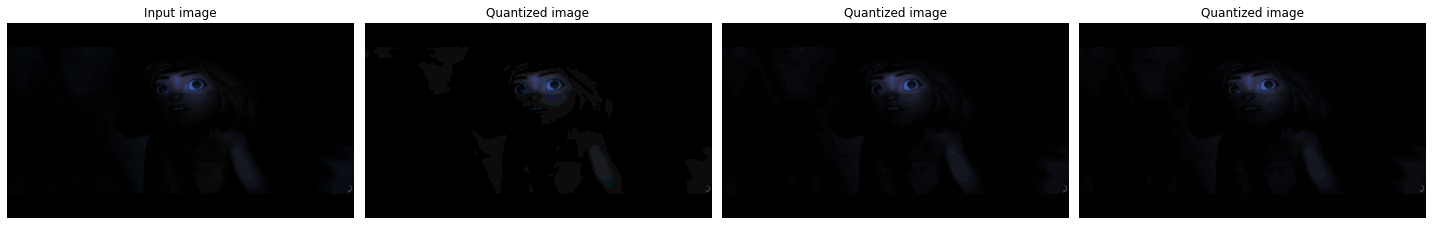

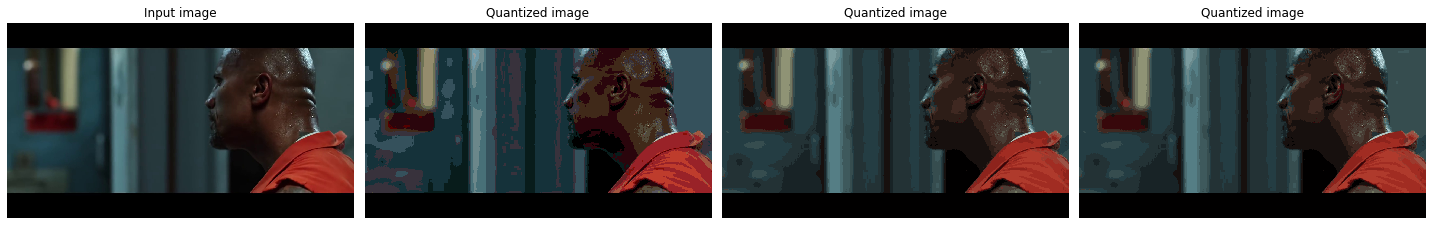

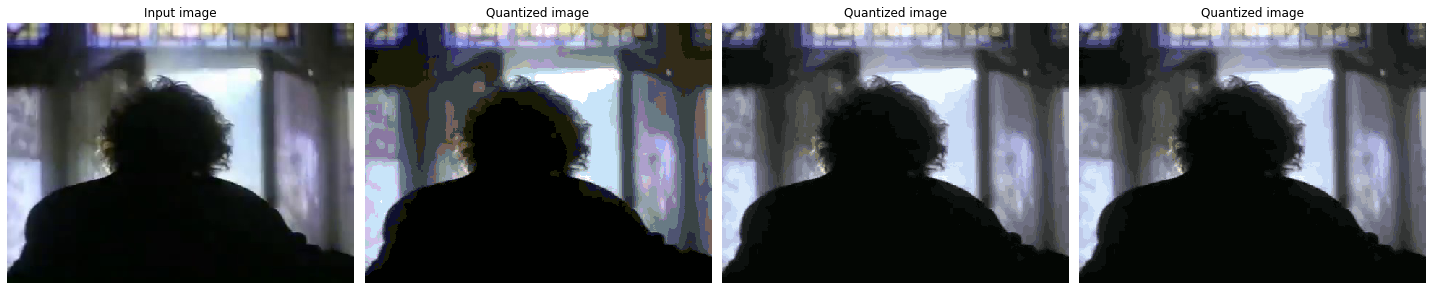

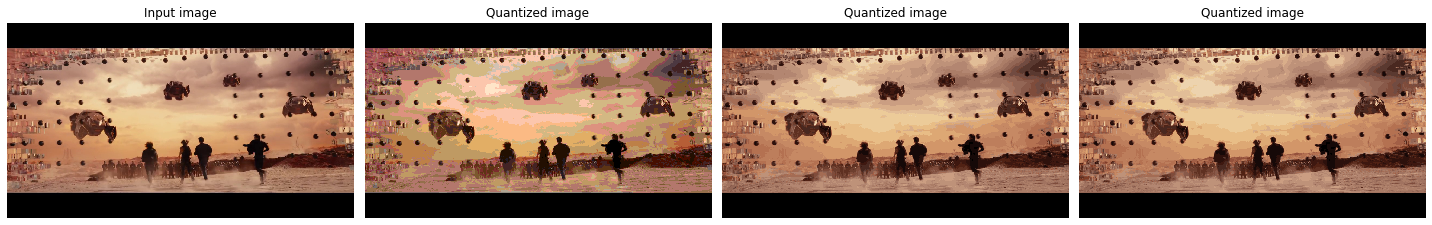

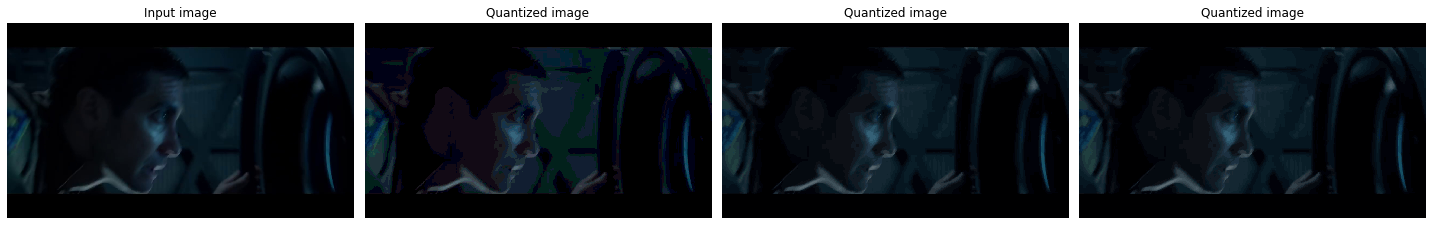

In [14]:
frames = glob.glob('../frames/*.jpg')
n = 32

for i in range(5):
    SAMPLE_IMAGE = random.choice(frames)
    im = Image.open(SAMPLE_IMAGE)
    q0 = im.quantize(n, method=1)
    q1 = im.quantize(n, method=1, kmeans=5)
    q2 = im.quantize(n, method=1, kmeans=32)


    plt.figure(figsize=(20,4))
    ax = plt.subplot(1, 4, 1)
    ax.set_title("Input image")
    ax.imshow(im)
    ax.axis("off")
    ax = plt.subplot(1, 4, 2)
    ax.set_title("Quantized image")
    ax.imshow(q0)
    ax.axis("off")
    ax = plt.subplot(1, 4, 3)
    ax.set_title("Quantized image")
    ax.imshow(q1)
    ax.axis("off")
    ax = plt.subplot(1, 4, 4)
    ax.set_title("Quantized image")
    ax.imshow(q2)
    ax.axis("off")
    plt.tight_layout()
    plt.show()

  File "/home/bmild/anaconda2/envs/comp-color/lib/python3.7/site-packages/colour/models/cie_xyy.py", line 336, in XYZ_to_xy
    return xyY_to_xy(XYZ_to_xyY(XYZ, illuminant))
  File "/home/bmild/anaconda2/envs/comp-color/lib/python3.7/site-packages/colour/models/cie_xyy.py", line 109, in XYZ_to_xyY
    tstack([X / (X + Y + Z), Y / (X + Y + Z),
/home/bmild/anaconda2/envs/comp-color/lib/python3.7/site-packages/colour/models/cie_xyy.py:109: RuntimeWarning: invalid value encountered in true_divide
  tstack([X / (X + Y + Z), Y / (X + Y + Z),


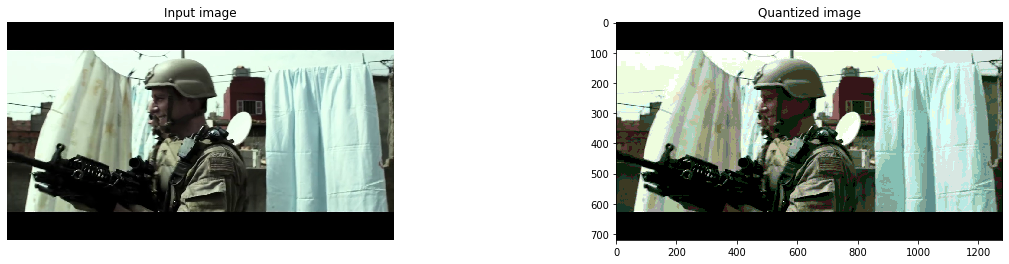

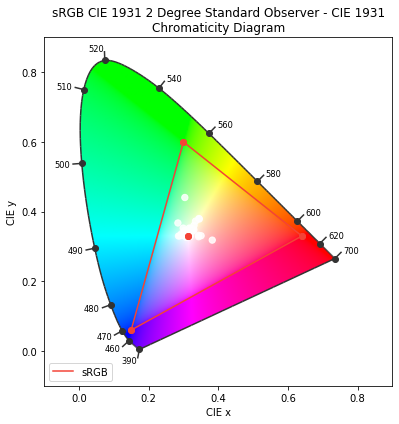

  File "/home/bmild/anaconda2/envs/comp-color/lib/python3.7/site-packages/colour/models/cie_xyy.py", line 336, in XYZ_to_xy
    return xyY_to_xy(XYZ_to_xyY(XYZ, illuminant))
  File "/home/bmild/anaconda2/envs/comp-color/lib/python3.7/site-packages/colour/models/cie_xyy.py", line 109, in XYZ_to_xyY
    tstack([X / (X + Y + Z), Y / (X + Y + Z),
/home/bmild/anaconda2/envs/comp-color/lib/python3.7/site-packages/colour/models/cie_xyy.py:109: RuntimeWarning: invalid value encountered in true_divide
  tstack([X / (X + Y + Z), Y / (X + Y + Z),


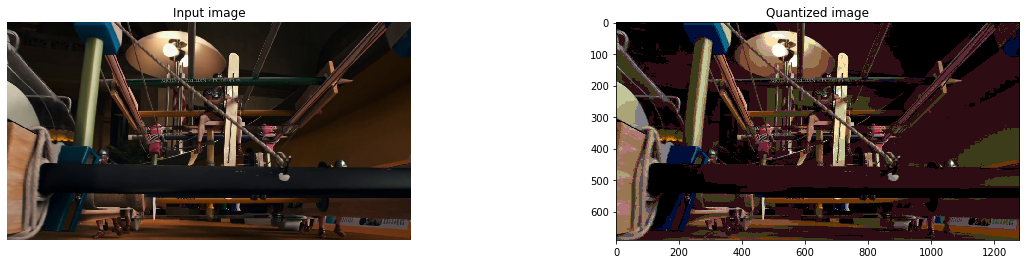

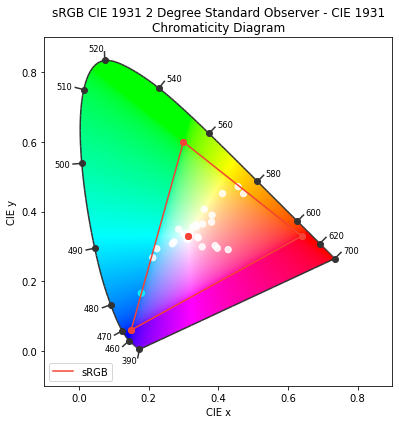

  File "/home/bmild/anaconda2/envs/comp-color/lib/python3.7/site-packages/colour/models/cie_xyy.py", line 336, in XYZ_to_xy
    return xyY_to_xy(XYZ_to_xyY(XYZ, illuminant))
  File "/home/bmild/anaconda2/envs/comp-color/lib/python3.7/site-packages/colour/models/cie_xyy.py", line 109, in XYZ_to_xyY
    tstack([X / (X + Y + Z), Y / (X + Y + Z),
/home/bmild/anaconda2/envs/comp-color/lib/python3.7/site-packages/colour/models/cie_xyy.py:109: RuntimeWarning: invalid value encountered in true_divide
  tstack([X / (X + Y + Z), Y / (X + Y + Z),


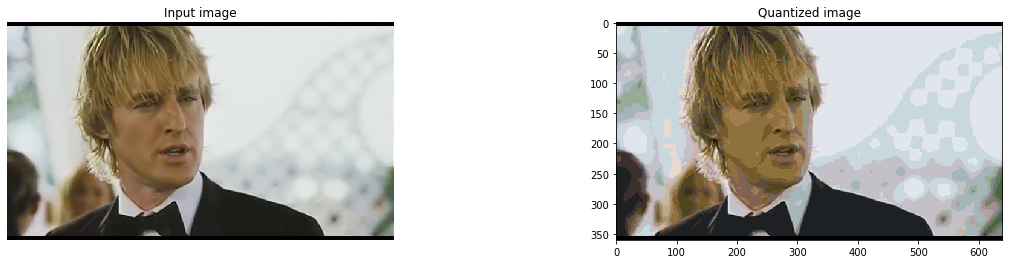

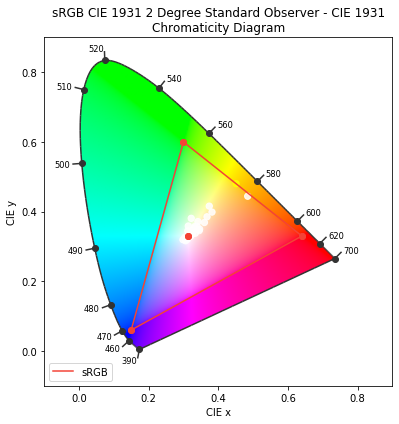

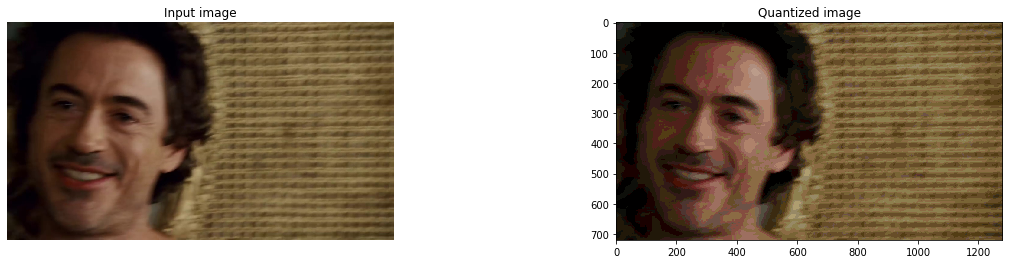

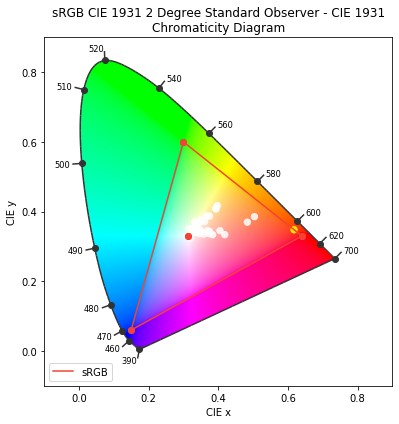

  File "/home/bmild/anaconda2/envs/comp-color/lib/python3.7/site-packages/colour/models/cie_xyy.py", line 336, in XYZ_to_xy
    return xyY_to_xy(XYZ_to_xyY(XYZ, illuminant))
  File "/home/bmild/anaconda2/envs/comp-color/lib/python3.7/site-packages/colour/models/cie_xyy.py", line 109, in XYZ_to_xyY
    tstack([X / (X + Y + Z), Y / (X + Y + Z),
/home/bmild/anaconda2/envs/comp-color/lib/python3.7/site-packages/colour/models/cie_xyy.py:109: RuntimeWarning: invalid value encountered in true_divide
  tstack([X / (X + Y + Z), Y / (X + Y + Z),


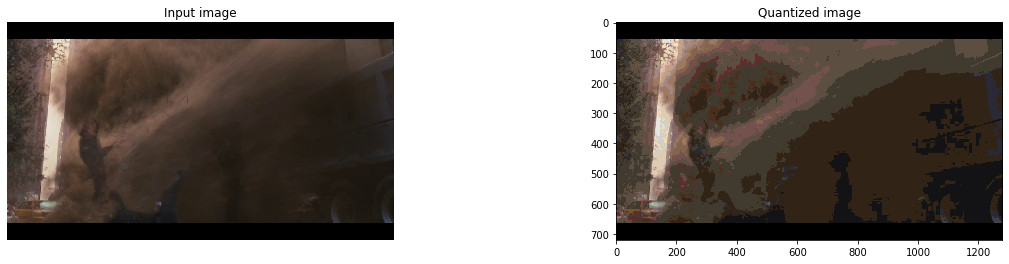

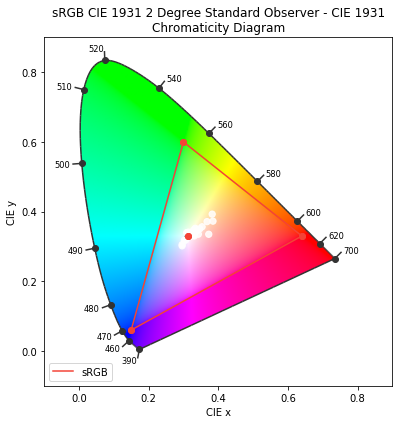

In [4]:
for i in range(5):
    SAMPLE_IMAGE = random.choice(frames)
    im = Image.open(SAMPLE_IMAGE)
    q1 = im.quantize(n, method=1).convert('RGB')
    colors = dict(q1.getcolors())
    points = list(colors.values())
    plt.figure(figsize=(20,4))
    ax = plt.subplot(1, 2, 1)
    ax.set_title("Input image")
    ax.imshow(im)
    ax.axis("off")
    ax = plt.subplot(1, 2, 2)
    ax.set_title("Quantized image")
    ax.imshow(q1)
    plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(points)


In [5]:
for i in range(5):
    SAMPLE_IMAGE = random.choice(frames)
    orig_im = Image.open(SAMPLE_IMAGE)
    q1 = orig_im.quantize(n, method=1).convert('RGB')
    # q1 = im
    q1 = np.asarray(q1)
    im = np.asarray(orig_im)
    r, g, b = cv.split(np.asarray(im))
    rq, gq, bq = cv.split(q1)

    fig = plt.figure(figsize=(24,8))
    axis = fig.add_subplot(1,3,1)
    axis.set_title('Original image')
    axis.imshow(orig_im)

    axis = fig.add_subplot(1, 3, 2, projection="3d")
    pixel_colors = im.reshape((np.shape(im)[0]*np.shape(im)[1], 3)) / 255
    pixel_colors = pixel_colors.tolist()
    axis.set_title('Full color distribution')
    axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")

    axis = fig.add_subplot(1, 3, 3, projection="3d")
    axis.set_title('Quantized color distribution')
    pixel_colors = q1.reshape((np.shape(q1)[0]*np.shape(q1)[1], 3)) / 255
    pixel_colors = pixel_colors.tolist()
    axis.scatter(rq.flatten(), gq.flatten(), bq.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")

    plt.show()

KeyboardInterrupt: 

# Some util func for visualization

In [6]:
from matplotlib import animation

def draw_color_3d(color_dist,
                  is_animate=False,
                  is_save=False,
                  s_path=None):
    # create figure
    rq, gq, bq = cv.split(color_dist)
    dpi = 250
    fig = plt.figure(dpi=dpi)
    ax = Axes3D(fig)
    ax.set_xlim(0, 255)
    ax.set_ylim(0, 255)
    ax.set_zlim(0, 255)
    ax.set_xticks(np.arange(0, 255, step=50))
    ax.set_yticks(np.arange(0, 255, step=50))
    ax.set_zticks(np.arange(0, 255, step=50))
    def init():
        """Init state for animation."""
        pixel_colors = color_dist.reshape(
            (np.shape(color_dist)[0]*np.shape(color_dist)[1], 3)) / 255
        pixel_colors = pixel_colors.tolist()
        ax.scatter(rq.flatten(),
                   gq.flatten(),
                   bq.flatten(),
                   facecolors=pixel_colors, marker=".")
        return fig

    if is_animate:
        def animate(i):
            ax.view_init(elev=10., azim=i*12)
            return fig

        anim = animation.FuncAnimation(
            fig, animate, init_func=init, frames=30, interval=20)
        if is_save:
            if s_path is None:
                s_path = './animation.mp4'
            anim.save(s_path, codec='mpeg4', fps=25, dpi=dpi)
            print('save to %s...' % (s_path))
        else:
            plt.show()
    else:
        init()
        plt.show()

save to ./animate_4.mp4...


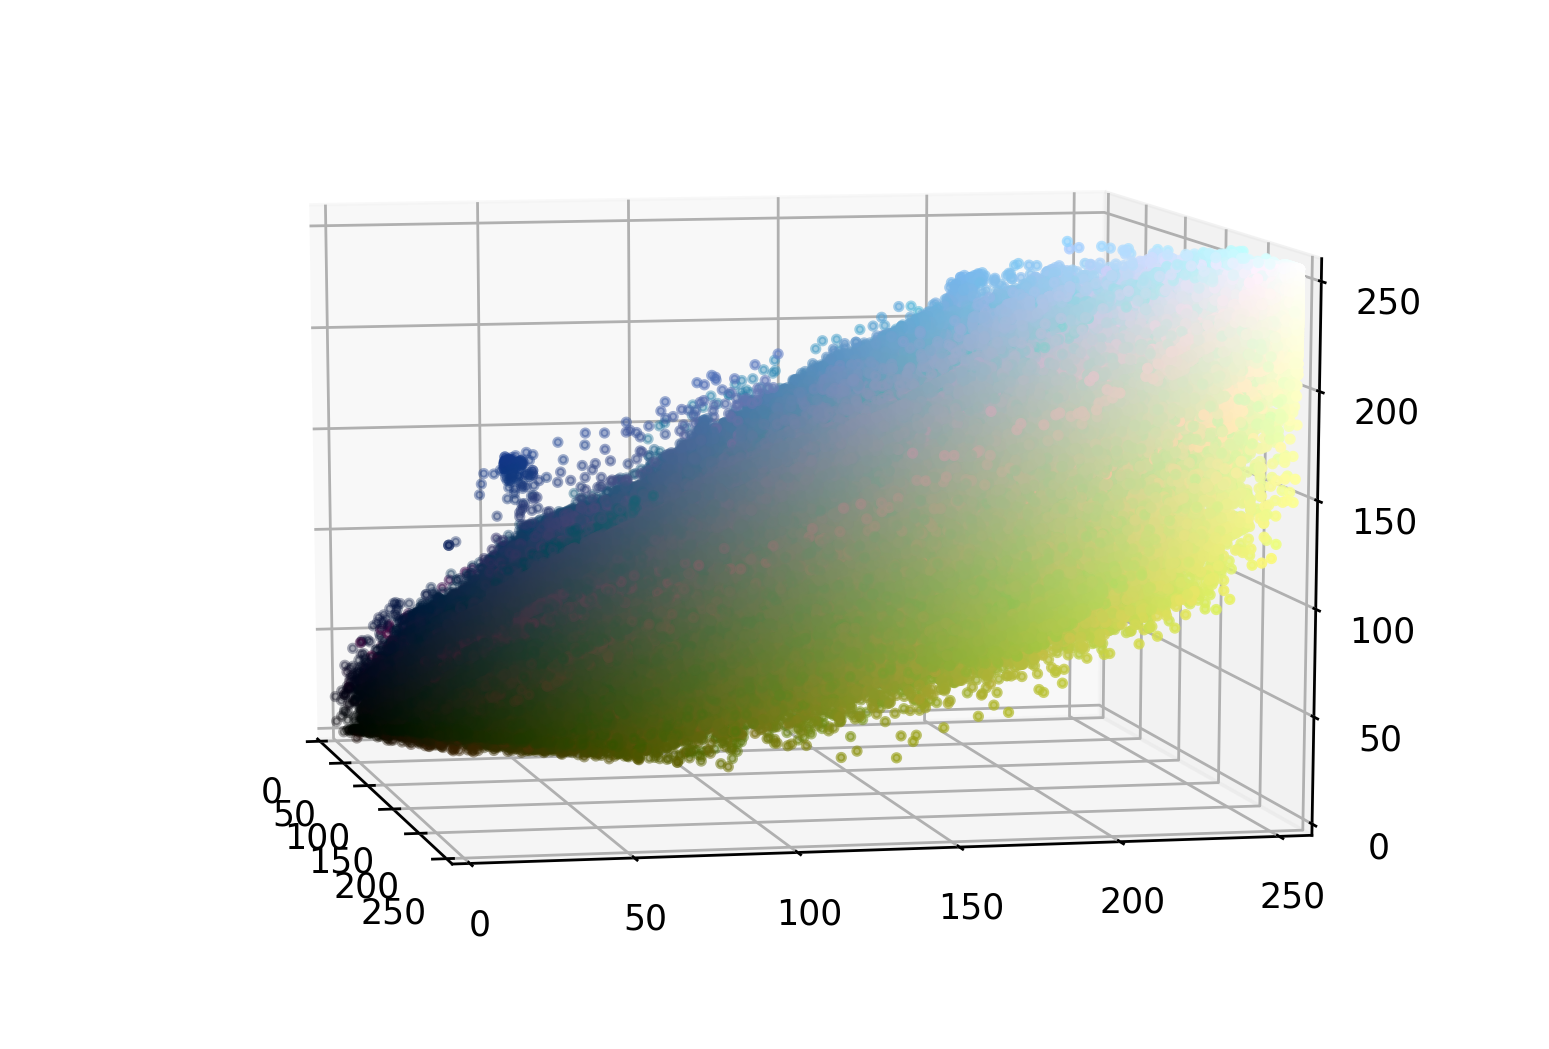

In [7]:
frames = glob.glob('casual_frames/*.jpg')
im = np.asarray(Image.open(random.choice(frames)))
draw_color_3d(im, is_animate=True, is_save=True, s_path='./animate_4.mp4')

# Plot 3D histogram using voxel grid

In [8]:
import data_utils
rsz = 0.25
im_rsz = data_utils.resize_pil(im, rsz)
gridres = (16, 16, 16)
im_flat = np.reshape(im_rsz, (-1, 3))
H, edges = np.histogramdd(im_flat, bins=gridres)
H = np.log(H+1)
print(H.max(), H.mean())

8.71078434047 0.384925286985


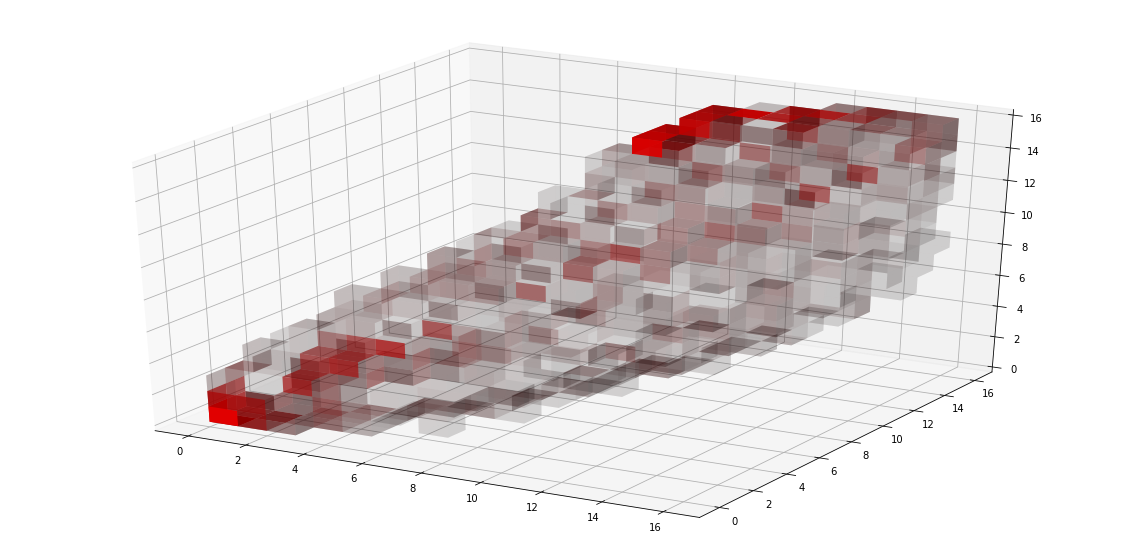

In [9]:
x, y, z = np.indices(gridres)
voxels = H

# set the colors of voxels, more red --> more pixels in that bin
colors = np.zeros(voxels.shape + (4,))
colors[..., 0] = H/H.max()
colors[..., 1] = 0
colors[..., 2] = 0
colors[..., 3] = H/H.max()

# and plot everything
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.voxels(voxels, facecolors=colors)

plt.show()